# Data-Driven documents with `d3`
[`d3`](http://d3js.org) is a powerful visualization framework, and powers the [`vega`](https://vega.github.io/vega/) extension for JupyterLab, which provides any kernel with rich display to create.

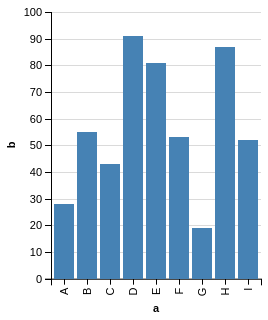

In [ ]:
display.display({
    "application/vnd.vegalite.v1+json": {
        "$schema": "https://vega.github.io/schema/vega-lite/v1.json",
        "description": "A simple bar chart with embedded data.",
        "data": {
            "values": [
                {"a": "A", "b": 28}, {"a": "B", "b": 55}, {"a": "C", "b": 43},
                {"a": "D", "b": 91}, {"a": "E", "b": 81}, {"a": "F", "b": 53},
                {"a": "G", "b": 19}, {"a": "H", "b": 87}, {"a": "I", "b": 52}
            ]
        },
        "mark": "bar",
        "encoding": {
            "x": {"field": "a", "type": "ordinal"},
            "y": {"field": "b", "type": "quantitative"}
        }
    }
})

Anyhow, because it's there, and **this is Jyve**, you can have it.

## A Hack: `d3` is dead, long live `d3`.
In transitioning to a many-repo development process between `v3` and `v4`, some libraries decided to stay on to the last release of the `v3` line, including the [`vega2-extension`](https://github.com/jupyterlab/jupyterlab/tree/master/packages/vega2-extension). So you get `d3=^3.5.17`, and that's that... for now.


> ### _🤔 How might we make multiple versions of a library available, if present?_

In [ ]:
now = new Date()
scales = {
    x: d3.time.scale()
        .domain([now, new Date(+now + 60*1000)])
        .range([0, 100]),
    y: d3.scale.linear()
        .domain([0, 255])
        .range([200, 0])
}

color = d3.scale.category10()

d3.select(document.body)
    .selectAll("style").remove()

d3.select(document.body)
    .append("style")
    .html(`
       .axis text {
          font: 10px sans-serif;
        }

        .axis path,
        .axis line {
          fill: none;
          stroke: #000;
          shape-rendering: crispEdges;
        } 
    `)


d3.select(document.body)
    .style({display: "flex", "flex-direction": "column"})
    .selectAll("svg")
    .remove()

svg = d3.select(document.body)
    .append("svg")
    .style({
        flex: 1,
    }) 

g = svg.append("g")
    .attr({"transform": "translate(0 20)"})

svg.append("text")
    .text("Files Saved by time and path length")
    .attr({y: 20, x: 200})
    .style({"font-family": "sans-serif", "text-anchor": "middle"})

data = []

axes = {
    x: d3.svg.axis().scale(scales.x).orient("bottom"),
    y: d3.svg.axis().scale(scales.y).orient("right"),
}

gax = {
    x: svg.append("g").attr({"class": "x axis", transform: "translate(0 220)"}),
    y: svg.append("g").attr({"class": "y axis", transform: "translate(400 20)"})
}

[object Object]

The update function. This could be improved!

In [ ]:
if(this.update) {
    JupyterLab.serviceManager.contents.fileChanged.disconnect(this.update);
}
update = function(g) {
    scales.x = scales.x.domain([ 
            now,
            new Date(data[data.length - 1].newValue.last_modified)
        ])
        .range([0, 400])

    gax.x.call(axes.x.scale(scales.x));
    gax.y.call(axes.y.scale(scales.y));
    
    g.selectAll("circle")
        .data(data)
        .enter()
        .append("circle")
        .attr({r: 0})

    g.selectAll("circle")
        .attr({
            cx: (d) => scales.x(new Date(d.newValue.last_modified)),
            cy: (d) => scales.y(d.newValue.path.length),
            r: 5
        })
        .style({
            fill: (d) => color(d.newValue.path),
            stroke: 'transparent'
        })
}

function (g) {
    scales.x = scales.x.domain([ 
            now,
            new Date(data[data.length - 1].newValue.last_modified)
        ])
        .range([0, 400])

    gax.x.call(axes.x.scale(scales.x));
    gax.y.call(axes.y.scale(scales.y));
    
    g.selectAll("circle")
        .data(data)
        .enter()
        .append("circle")
        .attr({r: 0})

    g.selectAll("circle")
        .attr({
            cx: (d) => scales.x(new Date(d.newValue.last_modified)),
            cy: (d) => scales.y(d.newValue.path.length),
            r: 5
        })
        .style({
            fill: (d) => color(d.newValue.path),
            stroke: 'transparent'
        })
}

Install the listener!

In [ ]:
console.log(JupyterLab.serviceManager.contents.fileChanged.connect(function(mgr, msg){
    console.log(msg)
    data.push(msg)
    g.call(window.update)
}))

Great, now save a file.